# **Mid-Submission: Analyse Sentiment Project** 
### Dicoding Academy Indonesia for Course "Belajar Pengembangan Machine Learning"

##### **Objective**: Doing a classification Sentiment from google play review. The Subject Review are from one of the most popular games "Mobile Legends Bang Bang"

This project is the result of completing a submission given by Dicoding Academy to course participants as one of the requirements to pass the current course theme. Sentiment analysis, a subset of text classification, aims to identify and evaluate opinions, attitudes, or emotions expressed in text. This topic can be a highly useful tool for understanding customer perspectives, public reactions to an event, and market sentiment toward a brand or product.

In this project, we evaluated various deep learning models for text classification to improve prediction accuracy. The tested models utilized different word representation techniques, including Word2Vec, FastText, and TF-IDF, as well as different network architectures such as LSTM, GRU, and SimpleRNN. This evaluation aims to determine the best-performing model for optimal predictions.

We conducted experiments with five different model combinations, using various data splits (70/30, 75/25, and 80/20) to ensure performance stability. The tested models include:

1. **Word2Vec + LSTM (80/20)**
2. **Word2Vec + GRU (75/25)**
3. **Word2Vec + SimpleRNN (80/20)**
4. **TF-IDF + Activation Tanh (70/30)**
5. **FastText + GRU (70/30)**

### **Libraries Used in This Project**  

1. **pandas** → Used to read CSV data obtained from web scraping and convert it into a DataFrame for easier analysis.  

2. **nltk** → A library that provides various tools and datasets for text processing. In this project, it is used for **tokenization, stemming, and lemmatization** in sentiment analysis.  

3. **wordcloud** → Used to visualize the most frequently occurring words in a text. The more often a word appears, the larger it will be displayed in the visualization.  

4. **gensim** → Used to import **Word2Vec**, a **word embedding** technique that converts words into numerical vectors in a high-dimensional space.  

5. **matplotlib** → A visualization library used to display **wordclouds** and various other charts in this project.  

6. **tensorflow** → Used to build **neural network** models for sentiment analysis. The models implemented include **LSTM (Long Short-Term Memory), GRU (Gated Recurrent Unit), and SimpleRNN**. These techniques allow the model to understand not only individual words but also the context of an entire sentence or paragraph by remembering previous words.  

7. **numpy** → A numerical computing package in Python used for complex mathematical operations, such as calculating data percentiles or finding the maximum value based on its index.  

In [ ]:
import re
import string
import pandas as pd
from collections import Counter
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models import Word2Vec

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import numpy as np
import json

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Embedding, Dense, Dropout, Bidirectional, BatchNormalization, LSTM, GRU, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

from gensim.models import FastText

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords, words
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from symspellpy import SymSpell, Verbosity

# Must download this package if you not ever use nltk before
# nltk.download("vader_lexicon")
# nltk.download('punkt_tab')
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('words')

Used reviews about Mobile Legend Games by user from United States. Using Google Play Scraper to get the data

In [ ]:
# path to file
freq_bigram_dict_path = r"c:\Users\USER\Documents\Belajar Data Science dicoding\Belajar Pengembangan Machine Learning\submission\dictionary\frequency_bigramdictionary_en_243_342.txt"
freq_dict_path = r"c:\Users\USER\Documents\Belajar Data Science dicoding\Belajar Pengembangan Machine Learning\submission\dictionary\frequency_dictionary_en_82_765.txt"

lexicon_moba_path = r"C:\Users\USER\Documents\Belajar Data Science dicoding\Belajar Pengembangan Machine Learning\submission\lexicon_slangwords\lexicon_moba.json"
slang_words_path = r"C:\Users\USER\Documents\Belajar Data Science dicoding\Belajar Pengembangan Machine Learning\submission\lexicon_slangwords\slangwords.json"

scraping_review_path = r"c:\Users\USER\Documents\Belajar Data Science dicoding\Belajar Pengembangan Machine Learning\submission\output\scraping_review_MLBB.csv"
typo_words_path = r"c:\Users\USER\Documents\Belajar Data Science dicoding\Belajar Pengembangan Machine Learning\submission\output\typo_words.txt"
word_dictionary_path = r"c:\Users\USER\Documents\Belajar Data Science dicoding\Belajar Pengembangan Machine Learning\submission\output\word_dictionary.txt"
word_dictionary_fixed_path = r"c:\Users\USER\Documents\Belajar Data Science dicoding\Belajar Pengembangan Machine Learning\submission\output\word_dictionary_fixed.txt"


In [4]:
all_data = pd.read_csv(scraping_review_path)
all_data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cfd501f2-f850-4a30-9262-b924613e0f4d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Its a good game. Just fix your matchmaking, I'...",1,1743,1.9.33.10117,2024-12-30 18:39:17,NaN,NaN,1.9.33.10117
1,b3e873e7-44c4-405a-a411-aa4198c46815,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"This game is extremely fun. However, there alw...",4,211,1.9.42.10341,2025-01-07 01:44:21,NaN,NaN,1.9.42.10341
2,2ba44b62-5436-4eef-8129-abb89f90eca6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,4rd and final edit: the blatant cheating in br...,1,130,1.9.42.10341,2025-01-04 18:04:12,NaN,NaN,1.9.42.10341
3,a6bc726d-4587-4bb1-9f4f-8841c9a67fe3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I enjoy the multiple characters, as well their...",4,427,1.9.33.10117,2024-11-28 02:18:48,NaN,NaN,1.9.33.10117
4,e352ddbf-9986-45be-960a-bff169a0598d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Long time player. Fun game when it runs well b...,1,144,1.9.42.10341,2025-01-02 01:41:16,NaN,NaN,1.9.42.10341
...,...,...,...,...,...,...,...,...,...,...,...
99995,c8414af5-ad2d-49be-8a38-ae4a6b4ed898,Gian Canillo,https://play-lh.googleusercontent.com/a/ACg8oc...,"Delete this game, useless because the other pl...",1,0,NaN,2021-09-27 20:27:46,NaN,NaN,NaN
99996,1433892e-349e-4bbe-9fc8-79ec02d1be3a,Rohdiana Lansui,https://play-lh.googleusercontent.com/a/ACg8oc...,The game is good but the game is force close m...,4,2,1.9.8.9833,2024-12-25 01:12:10,NaN,NaN,1.9.8.9833
99997,01892e7c-052c-481e-a7db-ff17e6442090,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,After i updated the app it often lagged becaus...,3,0,1.2.81.2853,2019-09-07 17:33:43,NaN,NaN,1.2.81.2853
99998,49f56247-021a-4102-8ed5-b87040aceb5c,Moshi Montefalcon,https://play-lh.googleusercontent.com/a-/ALV-U...,Poor matchmaking poor teammates. I am playing ...,1,0,NaN,2024-11-16 10:24:57,NaN,NaN,NaN


Checking the amount of data, data types, and identifying missing values. It can be seen that there are **100,000 rows** of data with various data types, such as **string, int, and float**. The **response** column shows a relatively low number, indicating that game developers do not reply to all user reviews, that's normal

In [5]:
all_data = all_data.drop_duplicates()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              100000 non-null  object
 1   userName              100000 non-null  object
 2   userImage             100000 non-null  object
 3   content               100000 non-null  object
 4   score                 100000 non-null  int64 
 5   thumbsUpCount         100000 non-null  int64 
 6   reviewCreatedVersion  80337 non-null   object
 7   at                    100000 non-null  object
 8   replyContent          2397 non-null    object
 9   repliedAt             2397 non-null    object
 10  appVersion            80337 non-null   object
dtypes: int64(2), object(9)
memory usage: 8.4+ MB


Drop Column won't needed for analysis

In [6]:
all_data = all_data.drop(columns=['reviewCreatedVersion','replyContent','repliedAt','appVersion'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewId       100000 non-null  object
 1   userName       100000 non-null  object
 2   userImage      100000 non-null  object
 3   content        100000 non-null  object
 4   score          100000 non-null  int64 
 5   thumbsUpCount  100000 non-null  int64 
 6   at             100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


There's no duplicate data entries, indicating that each account can provide only one unique review for the application. This also confirms that the data scraping process was conducted correctly. Since the **response** count is very low, we can remove it from our data processing as it is not sufficient to serve as an input variable for training data. Additionally, the **response** column is not essential for our analysis objectives.

#### **Preprocessing Text**

This section, I will process the text before it used for identification classification. The process will be cleaning the text from unwanted symbol or number, make text into lowercase, tokenizing, remove stopwords, lemmatizing the word into their base word, transform slang words into official one, and lastly minimize the typo word by checking one by one. List of Slang Get From This Source
- https://github.com/haierlord/resource/blob/master/slangs
- https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt

In [7]:
with open(slang_words_path,"r",encoding="utf-8") as file:
    slangwords = json.load(file)

lemmatizer = WordNetLemmatizer()

In [8]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove number
    text = re.sub(r'[^\w\s]', '', text) # remove character beside word dan number
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # remove character non-ASCII
 
    text = text.replace('\n', ' ') # replace new line with space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuation
    text = text.strip(' ') # remove space character in the beginning and the end sentence
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('english'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

"""
This code is used to determine the **Part-of-Speech (POS)** of a word in a format compatible with 
**WordNet** (from `nltk.corpus.wordnet`). It is useful when performing **lemmatization** with 
the **NLTK** library, as the **WordNet Lemmatizer** requires the correct POS information to be more accurate.
"""

def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) 

def lemmatizerText(texts):
    lemmatizer_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in texts]
    return lemmatizer_words

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

def get_custom_dictionary(text, name):
    all_words = [word for sublist in text for word in sublist]
    # all_text = ' '.join(text).split()
    word_counts = Counter(all_words)

    with open(name,"w") as file:
        for word, freq in word_counts.items():
            file.write(f"{word} {freq}\n")

Call the function to execute the preprocessing text

In [9]:
def preprocess_text(df, text_column):
    """
    Performs text preprocessing on a DataFrame, including:
    - Cleaning text
    - Casefolding (lowercasing)
    - Handling slang words
    - Tokenization
    - Lemmatization
    - Removing stopwords
    - Converting text back into a sentence
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the text data.
        text_column (str): Name of the text column to process.

    Returns:
        pd.DataFrame: DataFrame with additional columns for each preprocessing step.
    """
    df['text_casefolding'] = df[text_column].apply(casefoldingText)
    df['text_slangwords'] = df['text_casefolding'].apply(fix_slangwords)
    df['text_clean'] = df['text_slangwords'].apply(cleaningText)
    df['text_tokenized'] = df['text_clean'].apply(tokenizingText)
    df['text_lemmatized'] = df['text_tokenized'].apply(lemmatizerText)
    df['text_stopwords'] = df['text_lemmatized'].apply(filteringText)
    df['text_final'] = df['text_stopwords'].apply(toSentence)
    
    return df

In [10]:
# Apply the preprocessing function
all_data = preprocess_text(all_data, 'content')

# Display results
all_data

,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_casefolding,text_slangwords,text_clean,text_tokenized,text_lemmatized,text_stopwords,text_final
0,cfd501f2-f850-4a30-9262-b924613e0f4d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Its a good game. Just fix your matchmaking, I'...",1,1743,2024-12-30 18:39:17,"its a good game. just fix your matchmaking, i'...","it is a good game. just fix your matchmaking, ...",it is a good game just fix your matchmaking im...,"[it, is, a, good, game, just, fix, your, match...","[it, be, a, good, game, just, fix, your, match...","[good, game, fix, matchmaking, im, quite, skil...",good game fix matchmaking im quite skillful te...
1,b3e873e7-44c4-405a-a411-aa4198c46815,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"This game is extremely fun. However, there alw...",4,211,2025-01-07 01:44:21,"this game is extremely fun. however, there alw...","this game is extremely fun. however, there alw...",this game is extremely fun however there alway...,"[this, game, is, extremely, fun, however, ther...","[this, game, be, extremely, fun, however, ther...","[game, extremely, fun, however, always, seem, ...",game extremely fun however always seem another...
2,2ba44b62-5436-4eef-8129-abb89f90eca6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,4rd and final edit: the blatant cheating in br...,1,130,2025-01-04 18:04:12,4rd and final edit: the blatant cheating in br...,4rd and final edit: the blatant cheating in br...,rd and final edit the blatant cheating in braw...,"[rd, and, final, edit, the, blatant, cheating,...","[rd, and, final, edit, the, blatant, cheat, in...","[rd, final, edit, blatant, cheat, brawl, unbel...",rd final edit blatant cheat brawl unbelievably...
3,a6bc726d-4587-4bb1-9f4f-8841c9a67fe3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I enjoy the multiple characters, as well their...",4,427,2024-11-28 02:18:48,"i enjoy the multiple characters, as well their...","i enjoy the multiple characters, as well their...",i enjoy the multiple characters as well their ...,"[i, enjoy, the, multiple, characters, as, well...","[i, enjoy, the, multiple, character, a, well, ...","[enjoy, multiple, character, well, variety, sk...",enjoy multiple character well variety skill tr...
4,e352ddbf-9986-45be-960a-bff169a0598d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Long time player. Fun game when it runs well b...,1,144,2025-01-02 01:41:16,long time player. fun game when it runs well b...,long tears in my eyes player. fun game when it...,long tears in my eyes player fun game when it ...,"[long, tears, in, my, eyes, player, fun, game,...","[long, tear, in, my, eye, player, fun, game, w...","[long, tear, eye, player, fun, game, run, well...",long tear eye player fun game run well penalty...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c8414af5-ad2d-49be-8a38-ae4a6b4ed898,Gian Canillo,https://play-lh.googleusercontent.com/a/ACg8oc...,"Delete this game, useless because the other pl...",1,0,2021-09-27 20:27:46,"delete this game, useless because the other pl...","delete this game, useless because the other pl...",delete this game useless because the other pla...,"[delete, this, game, useless, because, the, ot...","[delete, this, game, useless, because, the, ot...","[delete, game, useless, player, play, full, st...",delete game useless player play full storage c...
99996,1433892e-349e-4bbe-9fc8-79ec02d1be3a,Rohdiana Lansui,https://play-lh.googleusercontent.com/a/ACg8oc...,The game is good but the game is force close m...,4,2,2024-12-25 01:12:10,the game is good but the game is force close m...,the game is good but the game is force close m...,the game is good but the game is force close m...,"[the, game, is, good, but, the, game, is, forc...","[the, game, be, good, but, the, game, be, forc...","[game, good, game, force, close, play, make, c...",game good game force close play make cause irr...
9999

After preprocessing the data, we can identify whether the tokenized text results match our expectations. By calling the previously created `get_custom_dictionary()` function, we will obtain a list of words based on the tokenization and other preprocessing steps. The result will be printed on word_dictionary.txt

In [11]:
get_custom_dictionary(all_data['text_stopwords'], word_dictionary_path)

#### **Fix Typo and Error Words**

The main challenge in preprocessing the text is handling words that contain typos or missing spaces, where reviewers forgot to separate them correctly. Fixing these issues manually would be extremely time-consuming. A more efficient solution is to use symspell, but in this case, we only doing for words that appear just **`once (1)`** in the dataset `word_dictionary.txt` we get before, as these words are likely to be typos or face a formatting errors. This approach not only saves time but also prevents correctly typed words from being unnecessarily modified. Even though, not likely can fix all the typos or error, but we can minimize that and improve our model

In [12]:
# Flatten all words from the tokenized column
all_words = [word for sublist in all_data['text_stopwords'] for word in sublist]

# Count occurrences of each word
word_counts = Counter(all_words)

# Get words that appear only once
unique_words = [word for word, count in word_counts.items() if count == 1]

# Save only typo words to file
np.savetxt(typo_words_path, unique_words, fmt="%s")

print(f"✅ Extracted {len(unique_words)} typo words to typo_words.txt")


✅ Extracted 39596 typo words to typo_words.txt


There are about 39k words that appear only **`once`** in all reviews. These words are listed and saved in typo_words.txt. This can be the first indication that the words are errors or incorrect.

I use a Python library called `SymSpell` to help me fix typos and split words that need to be separated. I use a frequency dictionary that I created and saved in `word_dictionary.txt`, along with a dictionary from GitHub `SymSpell` as a reference to correct the typos.

link dict freq: https://github.com/wolfgarbe/SymSpell/tree/master/SymSpell

In [13]:
print(freq_dict_path)
print(freq_bigram_dict_path)

c:\Users\USER\Documents\Belajar Data Science dicoding\Belajar Pengembangan Machine Learning\submission\dictionary\frequency_dictionary_en_82_765.txt
c:\Users\USER\Documents\Belajar Data Science dicoding\Belajar Pengembangan Machine Learning\submission\dictionary\frequency_bigramdictionary_en_243_342.txt


In [14]:
# Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=4, prefix_length=10, count_threshold=15)
dictionaries = [word_dictionary_path, freq_dict_path]

for dictionary in dictionaries:
    sym_spell.load_dictionary(dictionary, term_index=0, count_index=1)

sym_spell.load_bigram_dictionary(freq_bigram_dict_path, term_index=0, count_index=1)

# Function to split joined words
def split_words(text):
    segmented = sym_spell.word_segmentation(text)
    return segmented.corrected_string.split()  # Return best segmentation

# Function to correct typos
def correct_word(word):
    suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=4)
    return suggestions[0].term if suggestions else word  # Use best suggestion

# Load typo words
unique_words = np.loadtxt(typo_words_path, dtype=str)

# Apply word segmentation first
segmented_words = [split_words(word) for word in unique_words]

# Apply spell-check after segmentation
corrected_words = [[correct_word(w) for w in words] for words in segmented_words]

filtered_typo_words = [word for word in unique_words]
typo_correction_map = dict(zip(filtered_typo_words, corrected_words))

def replace_typo_words(text_list, typo_map):
    corrected_text = []
    for words in text_list:  
        if isinstance(words, list):  
            corrected_text.extend([typo_map.get(word, word) for word in words])  
        else:
            corrected_text.append(typo_map.get(words, words))  
    return [word for sublist in corrected_text for word in (sublist if isinstance(sublist, list) else [sublist])]  # Flatten

all_data['text_stopwords_notypo'] = all_data['text_stopwords'].apply(lambda x: replace_typo_words(x, typo_correction_map))
all_data["clean_content"] = all_data['text_stopwords_notypo'].apply(toSentence)

# Display results
all_data.head(20)

c:\Users\USER\anaconda3\Lib\site-packages\symspellpy\symspellpy.py:1098: UserWarning: Failed to parse frequency count as a 64 bit integer.
  warnings.warn("Failed to parse frequency count as a 64 bit integer.")


,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_casefolding,text_slangwords,text_clean,text_tokenized,text_lemmatized,text_stopwords,text_final,text_stopwords_notypo,clean_content
0,cfd501f2-f850-4a30-9262-b924613e0f4d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Its a good game. Just fix your matchmaking, I'...",1,1743,2024-12-30 18:39:17,"its a good game. just fix your matchmaking, i'...","it is a good game. just fix your matchmaking, ...",it is a good game just fix your matchmaking im...,"[it, is, a, good, game, just, fix, your, match...","[it, be, a, good, game, just, fix, your, match...","[good, game, fix, matchmaking, im, quite, skil...",good game fix matchmaking im quite skillful te...,"[good, game, fix, matchmaking, im, quite, skil...",good game fix matchmaking im quite skillful te...
1,b3e873e7-44c4-405a-a411-aa4198c46815,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"This game is extremely fun. However, there alw...",4,211,2025-01-07 01:44:21,"this game is extremely fun. however, there alw...","this game is extremely fun. however, there alw...",this game is extremely fun however there alway...,"[this, game, is, extremely, fun, however, ther...","[this, game, be, extremely, fun, however, ther...","[game, extremely, fun, however, always, seem, ...",game extremely fun however always seem another...,"[game, extremely, fun, however, always, seem, ...",game extremely fun however always seem another...
2,2ba44b62-5436-4eef-8129-abb89f90eca6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,4rd and final edit: the blatant cheating in br...,1,130,2025-01-04 18:04:12,4rd and final edit: the blatant cheating in br...,4rd and final edit: the blatant cheating in br...,rd and final edit the blatant cheating in braw...,"[rd, and, final, edit, the, blatant, cheating,...","[rd, and, final, edit, the, blatant, cheat, in...","[rd, final, edit, blatant, cheat, brawl, unbel...",rd final edit blatant cheat brawl unbelievably...,"[rd, final, edit, blatant, cheat, brawl, unbel...",rd final edit blatant cheat brawl unbelievably...
3,a6bc726d-4587-4bb1-9f4f-8841c9a67fe3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I enjoy the multiple characters, as well their...",4,427,2024-11-28 02:18:48,"i enjoy the multiple characters, as well their...","i enjoy the multiple characters, as well their...",i enjoy the multiple characters as well their ...,"[i, enjoy, the, multiple, characters, as, well...","[i, enjoy, the, multiple, character, a, well, ...","[enjoy, multiple, character, well, variety, sk...",enjoy multiple character well variety skill tr...,"[enjoy, multiple, character, well, variety, sk...",enjoy multiple character well variety skill tr...
4,e352ddbf-9986-45be-960a-bff169a0598d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Long time player. Fun game when it runs well b...,1,144,2025-01-02 01:41:16,long time player. fun game when it runs well b...,long tears in my eyes player. fun game when it...,long tears in my eyes player fun game when it ...,"[long, tears, in, my, eyes, player, fun, game,...","[long, tear, in, my, eye, player, fun, game, w...","[long, tear, eye, player, fun, game, run, well...",long tear eye player fun game run well penalty...,"[long, tear, eye, player, fun, game, run, well...",long tear eye player fun game run well penalty...
5,9d706bac-5038-4efb-a441-59d03c5f3e27,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It was fun, graphics r good. Controls smooth. ...",2,111,2024-12-06 22:07:11,"it was fun, graphics r good. controls smooth. ...","it was fun, graphics are good. controls smooth...",it was fun graphics are good controls smooth b...,"[it, was, fun, graphics, are, good, controls, ...","[it, be, fun, graphic, be, good, control, smoo...","[fun, graphic, good, control, smooth, reach, m...",fun graphic good control smooth reach master l...,"[fun, graphic, good, control, smooth, reach, m...",fun gr

Once again, use `preprocess_text` function to clean up the word that maybe still have a stopwords after word segmentation

In [15]:
# Apply the preprocessing function
all_data = preprocess_text(all_data, 'clean_content')
all_data

,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_casefolding,text_slangwords,text_clean,text_tokenized,text_lemmatized,text_stopwords,text_final,text_stopwords_notypo,clean_content
0,cfd501f2-f850-4a30-9262-b924613e0f4d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Its a good game. Just fix your matchmaking, I'...",1,1743,2024-12-30 18:39:17,good game fix matchmaking im quite skillful te...,good game fix matchmaking im quite skillful te...,good game fix matchmaking im quite skillful te...,"[good, game, fix, matchmaking, im, quite, skil...","[good, game, fix, matchmaking, im, quite, skil...","[good, game, fix, matchmaking, im, quite, skil...",good game fix matchmaking im quite skillful te...,"[good, game, fix, matchmaking, im, quite, skil...",good game fix matchmaking im quite skillful te...
1,b3e873e7-44c4-405a-a411-aa4198c46815,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"This game is extremely fun. However, there alw...",4,211,2025-01-07 01:44:21,game extremely fun however always seem another...,game extremely fun however always seem another...,game extremely fun however always seem another...,"[game, extremely, fun, however, always, seem, ...","[game, extremely, fun, however, always, seem, ...","[game, extremely, fun, however, always, seem, ...",game extremely fun however always seem another...,"[game, extremely, fun, however, always, seem, ...",game extremely fun however always seem another...
2,2ba44b62-5436-4eef-8129-abb89f90eca6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,4rd and final edit: the blatant cheating in br...,1,130,2025-01-04 18:04:12,rd final edit blatant cheat brawl unbelievably...,rd final edit blatant cheat brawl unbelievably...,rd final edit blatant cheat brawl unbelievably...,"[rd, final, edit, blatant, cheat, brawl, unbel...","[rd, final, edit, blatant, cheat, brawl, unbel...","[rd, final, edit, blatant, cheat, brawl, unbel...",rd final edit blatant cheat brawl unbelievably...,"[rd, final, edit, blatant, cheat, brawl, unbel...",rd final edit blatant cheat brawl unbelievably...
3,a6bc726d-4587-4bb1-9f4f-8841c9a67fe3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I enjoy the multiple characters, as well their...",4,427,2024-11-28 02:18:48,enjoy multiple character well variety skill tr...,enjoy multiple character well variety skill tr...,enjoy multiple character well variety skill tr...,"[enjoy, multiple, character, well, variety, sk...","[enjoy, multiple, character, well, variety, sk...","[enjoy, multiple, character, well, variety, sk...",enjoy multiple character well variety skill tr...,"[enjoy, multiple, character, well, variety, sk...",enjoy multiple character well variety skill tr...
4,e352ddbf-9986-45be-960a-bff169a0598d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Long time player. Fun game when it runs well b...,1,144,2025-01-02 01:41:16,long tear eye player fun game run well penalty...,long tear eye player fun game run well penalty...,long tear eye player fun game run well penalty...,"[long, tear, eye, player, fun, game, run, well...","[long, tear, eye, player, fun, game, run, well...","[long, tear, eye, player, fun, game, run, well...",long tear eye player fun game run well penalty...,"[long, tear, eye, player, fun, game, run, well...",long tear eye player fun game run well penalty...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c8414af5-ad2d-49be-8a38-ae4a6b4ed898,Gian Canillo,https://play-lh.googleusercontent.com/a/ACg8oc...,"Delete this game, useless because the other pl...",1,0,2021-09-27 20:27:46,delete game useless player play full storage c...,delete game useless player play full storage c...,delete game useless player play full storage c...,"[delete, game, useless, player, play, full, st...","[delete, game, useless, player, play, full, st...","[delete, game, useless, player, play, full, st...",delete game useless player play full storage c...,"[del

Get a Dictionary Count Word again and saved in `word_dictionary_fixed.txt`

In [16]:
get_custom_dictionary(all_data['text_stopwords'], word_dictionary_fixed_path)

#### **Labeling Sentimen**

This sentiment labeling utilizes Vader Sentiment Analysis from NLTK, incorporating a custom lexicon specifically tailored to the MLBB game environment (a MOBA game). The sentiment score ranges from 1 to -1, where 1 represents a highly positive statement and -1 signifies a highly negative one. The system classifies reviews as positive or negative based on Vader's predefined lexicon combined with the custom lexicon I have developed.

using method `update`, we can insert our custom lexicon as a additional dictionary for marking the sentiment

In [17]:
sentiments = SentimentIntensityAnalyzer()
with open(lexicon_moba_path, "r") as f:
    custom_lexicon = json.load(f)
sentiments.lexicon.update(custom_lexicon)

all_data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in all_data["text_final"]]
all_data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in all_data["text_final"]]
all_data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in all_data["text_final"]]
all_data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in all_data["text_final"]]
all_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_casefolding,text_slangwords,text_clean,text_tokenized,text_lemmatized,text_stopwords,text_final,text_stopwords_notypo,clean_content,Positive,Negative,Neutral,Compound
0,cfd501f2-f850-4a30-9262-b924613e0f4d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Its a good game. Just fix your matchmaking, I'...",1,1743,2024-12-30 18:39:17,good game fix matchmaking im quite skillful te...,good game fix matchmaking im quite skillful te...,good game fix matchmaking im quite skillful te...,"[good, game, fix, matchmaking, im, quite, skil...","[good, game, fix, matchmaking, im, quite, skil...","[good, game, fix, matchmaking, im, quite, skil...",good game fix matchmaking im quite skillful te...,"[good, game, fix, matchmaking, im, quite, skil...",good game fix matchmaking im quite skillful te...,0.218,0.298,0.484,-0.3103
1,b3e873e7-44c4-405a-a411-aa4198c46815,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"This game is extremely fun. However, there alw...",4,211,2025-01-07 01:44:21,game extremely fun however always seem another...,game extremely fun however always seem another...,game extremely fun however always seem another...,"[game, extremely, fun, however, always, seem, ...","[game, extremely, fun, however, always, seem, ...","[game, extremely, fun, however, always, seem, ...",game extremely fun however always seem another...,"[game, extremely, fun, however, always, seem, ...",game extremely fun however always seem another...,0.207,0.236,0.557,-0.2127
2,2ba44b62-5436-4eef-8129-abb89f90eca6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,4rd and final edit: the blatant cheating in br...,1,130,2025-01-04 18:04:12,rd final edit blatant cheat brawl unbelievably...,rd final edit blatant cheat brawl unbelievably...,rd final edit blatant cheat brawl unbelievably...,"[rd, final, edit, blatant, cheat, brawl, unbel...","[rd, final, edit, blatant, cheat, brawl, unbel...","[rd, final, edit, blatant, cheat, brawl, unbel...",rd final edit blatant cheat brawl unbelievably...,"[rd, final, edit, blatant, cheat, brawl, unbel...",rd final edit blatant cheat brawl unbelievably...,0.282,0.087,0.631,0.8399
3,a6bc726d-4587-4bb1-9f4f-8841c9a67fe3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I enjoy the multiple characters, as well their...",4,427,2024-11-28 02:18:48,enjoy multiple character well variety skill tr...,enjoy multiple character well variety skill tr...,enjoy multiple character well variety skill tr...,"[enjoy, multiple, character, well, variety, sk...","[enjoy, multiple, character, well, variety, sk...","[enjoy, multiple, character, well, variety, sk...",enjoy multiple character well variety skill tr...,"[enjoy, multiple, character, well, variety, sk...",enjoy multiple character well variety skill tr...,0.247,0.171,0.582,0.6597
4,e352ddbf-9986-45be-960a-bff169a0598d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Long time player. Fun game when it runs well b...,1,144,2025-01-02 01:41:16,long tear eye player fun game run well penalty...,long tear eye player fun game run well penalty...,long tear eye player fun game run well penalty...,"[long, tear, eye, player, fun, game, run, well...","[long, tear, eye, player, fun, game, run, well...","[long, tear, eye, player, fun, game, run, well...",long tear eye player fun game run well penalty...,"[long, tear, eye, player, fun, game, run, well...",long tear eye player fun game run well penalty...,0.282,0.216,0.502,0.3628


In [18]:
score = all_data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
all_data["Sentiment"] = sentiment
all_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_casefolding,text_slangwords,text_clean,...,text_lemmatized,text_stopwords,text_final,text_stopwords_notypo,clean_content,Positive,Negative,Neutral,Compound,Sentiment
0,cfd501f2-f850-4a30-9262-b924613e0f4d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Its a good game. Just fix your matchmaking, I'...",1,1743,2024-12-30 18:39:17,good game fix matchmaking im quite skillful te...,good game fix matchmaking im quite skillful te...,good game fix matchmaking im quite skillful te...,...,"[good, game, fix, matchmaking, im, quite, skil...","[good, game, fix, matchmaking, im, quite, skil...",good game fix matchmaking im quite skillful te...,"[good, game, fix, matchmaking, im, quite, skil...",good game fix matchmaking im quite skillful te...,0.218,0.298,0.484,-0.3103,Negative
1,b3e873e7-44c4-405a-a411-aa4198c46815,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"This game is extremely fun. However, there alw...",4,211,2025-01-07 01:44:21,game extremely fun however always seem another...,game extremely fun however always seem another...,game extremely fun however always seem another...,...,"[game, extremely, fun, however, always, seem, ...","[game, extremely, fun, however, always, seem, ...",game extremely fun however always seem another...,"[game, extremely, fun, however, always, seem, ...",game extremely fun however always seem another...,0.207,0.236,0.557,-0.2127,Negative
2,2ba44b62-5436-4eef-8129-abb89f90eca6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,4rd and final edit: the blatant cheating in br...,1,130,2025-01-04 18:04:12,rd final edit blatant cheat brawl unbelievably...,rd final edit blatant cheat brawl unbelievably...,rd final edit blatant cheat brawl unbelievably...,...,"[rd, final, edit, blatant, cheat, brawl, unbel...","[rd, final, edit, blatant, cheat, brawl, unbel...",rd final edit blatant cheat brawl unbelievably...,"[rd, final, edit, blatant, cheat, brawl, unbel...",rd final edit blatant cheat brawl unbelievably...,0.282,0.087,0.631,0.8399,Positive
3,a6bc726d-4587-4bb1-9f4f-8841c9a67fe3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I enjoy the multiple characters, as well their...",4,427,2024-11-28 02:18:48,enjoy multiple character well variety skill tr...,enjoy multiple character well variety skill tr...,enjoy multiple character well variety skill tr...,...,"[enjoy, multiple, character, well, variety, sk...","[enjoy, multiple, character, well, variety, sk...",enjoy multiple character well variety skill tr...,"[enjoy, multiple, character, well, variety, sk...",enjoy multiple character well variety skill tr...,0.247,0.171,0.582,0.6597,Positive
4,e352ddbf-9986-45be-960a-bff169a0598d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Long time player. Fun game when it runs well b...,1,144,2025-01-02 01:41:16,long tear eye player fun game run well penalty...,long tear eye player fun game run well penalty...,long tear eye player fun game run well penalty...,...,"[long, tear, eye, player, fun, game, run, well...","[long, tear, eye, player, fun, game, run, well...",long tear eye player fun game run well penalty...,"[long, tear, eye, player, fun, game, run, well...",long tear eye player fun game run well penalty...,0.282,0.216,0.502,0.3628,Positive


Using the compound score provided by Vader, we determine whether the sentiment is positive, negative, or neutral. First, we initialize the `SentimentIntensityAnalyzer()` and update its lexicon with a custom MOBA-related sentiment dictionary stored in `lexicon_moba.json`.  

For each text entry in `all_data["text_final"]`, we calculate the positive, negative, neutral, and compound sentiment scores using Vader's `polarity_scores()`. The compound score, which represents an overall sentiment score ranging from -1 to 1, is then used as the primary criterion for classification.  

To categorize sentiment:  
- If the compound score is **greater than or equal to 0.05**, the review is labeled as **"Positive"**.  
- If the compound score is **less than or equal to -0.05**, it is labeled as **"Negative"**.  
- If the score falls between **-0.05 and 0.05**, it is considered **"Neutral"**.  

Finally, the classified sentiments are stored in the `Sentiment` column of `all_data`.

In [19]:
all_data['Sentiment'].value_counts()

Sentiment
Positive    59347
Negative    37765
Neutral      2888
Name: count, dtype: int64

From result above, we know that we have encounter a unbalanced dataset sentiment. If we do not balance the dataset, the model may become biased toward the majority class, leading to poor performance in predicting the minority class. This can result in misleading accuracy, where the model appears to perform well overall but fails to correctly classify the less frequent sentiments. Additionally, an unbalanced dataset can cause the model to learn patterns that do not generalize well, reducing its effectiveness in real-world applications.

Therefore, we will balance the dataset using random oversampling. This technique involves increasing the number of samples in the minority class by duplicating existing samples. By doing so, we help the model learn more balanced patterns, improving its ability to classify all sentiment categories accurately and reducing bias toward the majority class.

#### Random Oversampling

In [20]:
# Seperate data by sentiment
positive_data = all_data[all_data["Sentiment"] == "Positive"]
negative_data = all_data[all_data["Sentiment"] == "Negative"]
neutral_data = all_data[all_data["Sentiment"] == "Neutral"]

# Determine the target number so that all classes are balanced (using the largest class)
target_size = max(len(positive_data), len(negative_data), len(neutral_data))

# Oversampling minority class
positive_upsampled = resample(positive_data, replace=True, n_samples=target_size, random_state=42)
negative_upsampled = resample(negative_data, replace=True, n_samples=target_size, random_state=42)
neutral_upsampled = resample(neutral_data, replace=True, n_samples=target_size, random_state=42)

# Re-merge the balanced data
balanced_data = pd.concat([positive_upsampled, negative_upsampled, neutral_upsampled])

# Check class distribution after balancing
balanced_data["Sentiment"].value_counts()

Sentiment
Positive    59347
Negative    59347
Neutral     59347
Name: count, dtype: int64

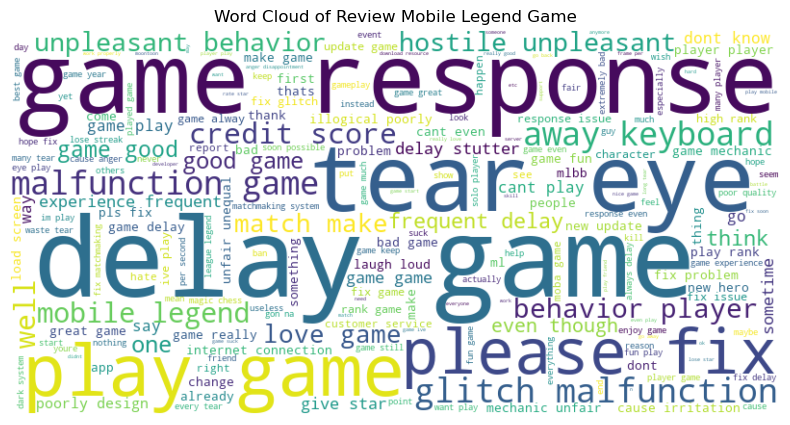

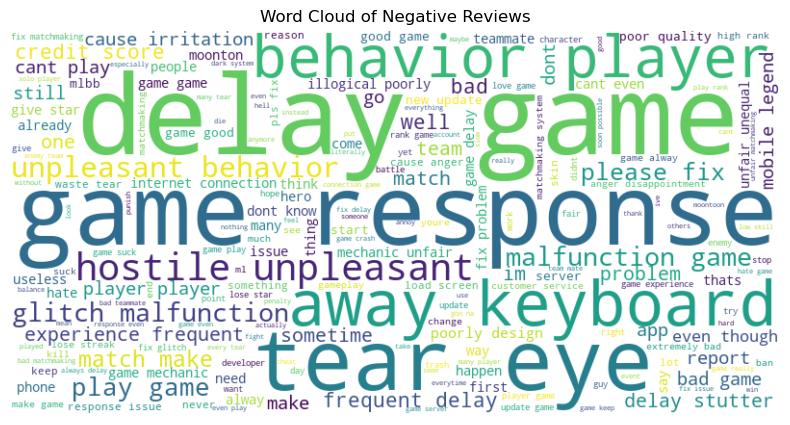

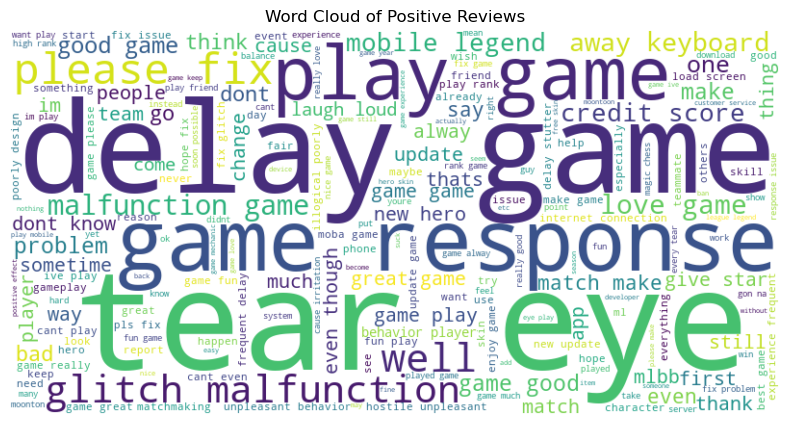

In [21]:
# Using WordCloud to get word often appear on the review based on Sentiment
text = ' '.join(all_data['text_final'])
negative_text = ' '.join(all_data[all_data['Sentiment'] == 'Negative']['text_final'])
positive_text = ' '.join(all_data[all_data['Sentiment'] == 'Positive']['text_final'])

def generate_wordcloud(text, title="Word Cloud", width=800, height=400, background_color='white', colormap='viridis'):
    """
    Generate and display a WordCloud for a given text.
    
    Parameters:
    text (str): The input text for generating the WordCloud.
    title (str): The title of the WordCloud plot.
    width (int): Width of the WordCloud image.
    height (int): Height of the WordCloud image.
    background_color (str): Background color of the WordCloud.
    colormap (str): Color map for the WordCloud.
    """
    wordcloud = WordCloud(width=width, height=height, background_color=background_color, colormap=colormap).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(text, title="Word Cloud of Review Mobile Legend Game")
generate_wordcloud(negative_text, title="Word Cloud of Negative Reviews")
generate_wordcloud(positive_text, title="Word Cloud of Positive Reviews")

**Common Words in Overall Reviews:**  
The most frequently mentioned words in the overall reviews are **"play game"**, **"game response"**, **"delay game"**, and **"tear eye"**. This indicates that players often discuss **game mechanics**, particularly regarding **the responsiveness of characters and gameplay**. Additionally, **frequent delays** seem to be a major issue affecting the overall gaming experience.  

**Common Words in Negative Reviews:**  
The four words found in the overall reviews also appear in negative reviews, with additional terms such as:  
- **"player behavior"** – Many players express dissatisfaction with the way others behave in the game.  
- **"AFK" (away from keyboard)** – A common complaint is about players who **leave matches mid-game**, negatively impacting the experience of their teammates.  
- **"toxic attitude"** – Some players complain about **hostile or unfriendly interactions** with others in the game.  
- **"glitch issues"** – Reports of **bugs and glitches** that disrupt gameplay.  

**Common Words in Positive Reviews:**  
In positive reviews, the four commonly found words appear again, along with additional terms like:  
- **"credit score system"** – Players appreciate a system that **rewards or punishes player behavior** to maintain a fair gaming environment.  
- **"matchmaking system"** – Some users praise the **game’s ability to match them with suitable opponents or teammates**.  
- **"hero balance"** – Many reviews highlight **the strength and uniqueness of heroes**, often complimenting **hero designs and gameplay mechanics**.  

**Final Analysis**  
From the WordCloud analysis, it is evident that **game responsiveness and delays are the most-discussed topics**. Negative reviews focus heavily on **player behavior, unfair gameplay experiences, and technical issues** such as **glitches**. Meanwhile, positive reviews appreciate **matchmaking, hero balance, and systems that encourage fair play**.  

This suggests that **improving game performance and addressing toxic behavior** could significantly enhance the overall player experience.

#### **Modelling**

In this modeling process, we will use three different combinations:
1. **Combination Using Word2Vec**  
    - **Word2Vec + LSTM** with an **80% train and 20% test** split.  
    - **Word2Vec + GRU** with a **75% train and 25% test** split.  
    - **Word2Vec + SimpleRNN** with an **80% train and 20% test** split.

2. **Combination Using TF-IDF**
    - **TF-IDF + Activation Tanh** with an **70% train and 30% test** split.

3. **Combination Using FastText**
    - **FastText + GRU** with an **80% train and 20% test**

Target from this project are to get at least one of the model get **92% accuracy** for train and test to complete the submission


In [103]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluates the model on training and test datasets.
    
    Parameters:
    model: Trained model to evaluate
    X_train, y_train: Training data and labels
    X_test, y_test: Test data and labels
    
    Returns:
    Dictionary containing train and test loss and accuracy
    """
    
    loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=0)
    loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=0)
    
    results = {
        "Test Loss": round(loss_test, 4),
        "Test Accuracy": round(accuracy_test * 100, 2),
        "Train Loss": round(loss_train, 4),
        "Train Accuracy": round(accuracy_train * 100, 2)
    }
    
    for key, value in results.items():
        print(f"{key}: {value}")
    
    return results

In [104]:
def predict_and_display(model, X_test, y_test, all_data, label_mapping, num_samples=5):
    """
    Predicts sentiment classes and displays results for a given number of test samples.
    
    Parameters:
    model: Trained model to make predictions
    X_test: Test dataset
    y_test: True labels of test dataset
    all_data: DataFrame containing the original text data
    label_mapping: Dictionary mapping class indices to sentiment labels
    num_samples: Number of samples to display (default: 5)
    
    Returns:
    None
    """
    
    y_pred_prob = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)
    y_pred_labels = [label_mapping[pred] for pred in y_pred_classes]
    
    for i in range(num_samples):
        print(f"Text: {all_data['content'].iloc[i]}")
        print(f"Actual Sentiment: {label_mapping[np.argmax(y_test[i])]}")
        print(f"Predicted Sentiment: {y_pred_labels[i]}")
        print("-" * 50)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.92):
      print(f"\nAkurasi Test telah mencapai >92% pada epoch {epoch+1}!")
      self.model.stop_training = True
callbacks = myCallback()

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    verbose=1
)

In [106]:
label_mapping = {
    "Negative": 0, 
    "Neutral": 1, 
    "Positive": 2
}

code_mapping = {
    0: "Negative", 
    1: "Neutral", 
    2: "Positive"
}

optimizer = Adam(learning_rate=0.001)
embedding_dim = 150

#### Combination 1: Using Word2Vec

In [107]:
# Label convertion to one-hot encoding format
y = np.array([int(label_mapping[label]) for label in all_data['Sentiment']])
y = to_categorical(y, num_classes=3)
y = y.astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
# Manual Tokenization
tokenized_texts = all_data['text_stopwords']

# Train Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=embedding_dim, window=5, min_count=3, workers=4)

word_index = {word: i+1 for i, word in enumerate(word2vec_model.wv.index_to_key)}
vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]
        
# Tokenisasi using word2vec word_index
sequences = []
for text in all_data['text_stopwords']:
    seq = [word_index.get(word, 0) for word in text]  # map words to indexes, 0 if not found
    sequences.append(seq)

# Check the length of each sentence
sentence_lengths = [len(seq) for seq in sequences]
max_length = int(np.percentile(sentence_lengths, 95))
print(f"Max Length (Persentil 95%): {max_length}")

X = pad_sequences(sequences, maxlen=max_length, padding='post')
print(f"Max Length: {X.shape}")

Max Length (Persentil 95%): 52
Max Length: (100000, 52)


LSTM, 80/20

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=True),  # Pre-trained Word2Vec
              
    Bidirectional(LSTM(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001)), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.3),  
    BatchNormalization(momentum=0.95),
    
    # Additional LSTMs to capture more sequential patterns
    LSTM(32, return_sequences=False),   
    Dropout(0.4),  

    # Output layer (Softmax for multi-class classification)
    Dense(3, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │     2,087,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,087,400 (7.96 MB)

 Trainable params: 2,087,400 (7.96 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
history_1 = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=128, 
    callbacks=[
        callbacks,
        early_stopping,
        lr_scheduler
    ], 
    validation_data=(X_test, y_test), 
)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 307s 482ms/step - accuracy: 0.7360 - loss: 0.8218 - val_accuracy: 0.8630 - val_loss: 0.4282 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 306s 489ms/step - accuracy: 0.8803 - loss: 0.3888 - val_accuracy: 0.8910 - val_loss: 0.3632 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 300s 479ms/step - accuracy: 0.9069 - loss: 0.3075 - val_accuracy: 0.9054 - val_loss: 0.2935 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 300s 480ms/step - accuracy: 0.9288 - loss: 0.2438 - val_accuracy: 0.9048 - val_loss: 0.2853 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 284s 455ms/step - accuracy: 0.9367 - loss: 0.2177 - val_accuracy: 0.9135 - val_loss: 0.2737 - learning_rate: 0.0010
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 966s 2s/step - accuracy: 0.9439 - loss: 0.1951 - val_accuracy: 0.9158 - val_loss: 0.2692 - learning_rate: 0.0010
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 397s 551ms/step - ac

In [112]:
evaluate_model(model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Test Loss: 0.2678
Test Accuracy: 92.05
Train Loss: 0.1322
Train Accuracy: 95.98


{'Test Loss': 0.2678,
 'Test Accuracy': 92.05,
 'Train Loss': 0.1322,
 'Train Accuracy': 95.98}

In [113]:
predict_and_display(model, X_test_reshaped, y_test, all_data, code_mapping, num_samples=5)

625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 65ms/step
Text: Its a good game. Just fix your matchmaking, I'm quite skillful, but teammates drag me down. I often encounter feeders, which leads to me losing. Mythic rank players are not meant to be beginners who get carried by their friends. This game is more stressful than enjoyable, all because of matchmaking. Whenever the season resets, I never seem to be able to get more than 3 wins, while always getting 5 or 6 losses in a row. You don't need to patch anything besides your stupid matchmaking system.
Actual Sentiment: Neutral
Predicted Sentiment: Neutral
--------------------------------------------------
Text: This game is extremely fun. However, there always seems to be another issue with this game. Whether it's characters that are too ridiculously broken and need nurfed, or straight up the inability to simply leave a game when I want, even with exceptions of consequences. Add the ability to leave games (because I'm tired of playing with teams wh

GRU, 75/25

In [117]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, stratify=y, test_size=0.25,random_state=42)
X_train_reshaped_2 = X_train_2.reshape((X_train_2.shape[0], X_train_2.shape[1], 1))
X_test_reshaped_2 = X_test_2.reshape((X_test_2.shape[0], X_test_2.shape[1], 1))

In [ ]:
model_2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=True),  # Pre-trained Word2Vec
              
    Bidirectional(GRU(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.001)), input_shape=(X_train_reshaped_2.shape[1], X_train_reshaped_2.shape[2])),
    Dropout(0.3),  
    BatchNormalization(momentum=0.95),
    
    # Additional LSTMs to capture more sequential patterns
    GRU(64, return_sequences=False),   
    Dropout(0.4),  

    # Output layer (Softmax for multi-class classification)
    Dense(3, activation='softmax'),
])

optimizer = Adam(learning_rate=0.001)
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [119]:
history_2 = model_2.fit(
    X_train_2, 
    y_train_2, 
    epochs=100, 
    batch_size=128, 
    callbacks=[
        callbacks,
        early_stopping,
        lr_scheduler
    ], 
    validation_data=(X_test_2, y_test_2), 
)

Epoch 1/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 422s 703ms/step - accuracy: 0.6366 - loss: 0.9384 - val_accuracy: 0.8519 - val_loss: 0.4372 - learning_rate: 0.0010
Epoch 2/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 429s 732ms/step - accuracy: 0.8777 - loss: 0.3965 - val_accuracy: 0.8950 - val_loss: 0.3265 - learning_rate: 0.0010
Epoch 3/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 407s 672ms/step - accuracy: 0.9092 - loss: 0.2984 - val_accuracy: 0.9031 - val_loss: 0.3033 - learning_rate: 0.0010
Epoch 4/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 491s 755ms/step - accuracy: 0.9262 - loss: 0.2477 - val_accuracy: 0.9096 - val_loss: 0.2860 - learning_rate: 0.0010
Epoch 5/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 399s 681ms/step - accuracy: 0.9374 - loss: 0.2131 - val_accuracy: 0.9151 - val_loss: 0.2727 - learning_rate: 0.0010
Epoch 6/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 398s 607ms/step - accuracy: 0.9416 - loss: 0.2006 - val_accuracy: 0.9137 - val_loss: 0.2850 - learning_rate: 0.0010
Epoch 7/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 377s 598ms/step -

In [120]:
evaluate_model(model=model_2, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)

Test Loss: 0.2727
Test Accuracy: 91.51
Train Loss: 0.1763
Train Accuracy: 95.07


{'Test Loss': 0.2727,
 'Test Accuracy': 91.51,
 'Train Loss': 0.1763,
 'Train Accuracy': 95.07}

In [121]:
predict_and_display(model_2, X_test_reshaped_2, y_test_2, all_data, code_mapping, num_samples=5)

782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step
Text: Its a good game. Just fix your matchmaking, I'm quite skillful, but teammates drag me down. I often encounter feeders, which leads to me losing. Mythic rank players are not meant to be beginners who get carried by their friends. This game is more stressful than enjoyable, all because of matchmaking. Whenever the season resets, I never seem to be able to get more than 3 wins, while always getting 5 or 6 losses in a row. You don't need to patch anything besides your stupid matchmaking system.
Actual Sentiment: Positive
Predicted Sentiment: Positive
--------------------------------------------------
Text: This game is extremely fun. However, there always seems to be another issue with this game. Whether it's characters that are too ridiculously broken and need nurfed, or straight up the inability to simply leave a game when I want, even with exceptions of consequences. Add the ability to leave games (because I'm tired of playing with teams 

SimpleRNN, 80/20

In [138]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, stratify=y, test_size=0.2,random_state=42)
X_train_reshaped_3 = X_train_3.reshape((X_train_3.shape[0], X_train_3.shape[1], 1))
X_test_reshaped_3 = X_test_3.reshape((X_test_3.shape[0], X_test_3.shape[1], 1))

In [ ]:
model_3 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=True),  # Pre-trained Word2Vec
              
    SimpleRNN(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.0005), input_shape=(X_train_reshaped_3.shape[1], X_train_reshaped_3.shape[2])),
    Dropout(0.3),  
    BatchNormalization(momentum=0.95),
    
    # Additional LSTMs to capture more sequential patterns
    SimpleRNN(64, activation='relu', return_sequences=True),   
    Dropout(0.3),  

    SimpleRNN(32, activation='relu', return_sequences=False),   
    Dropout(0.3),  

    # Output layer (Softmax for multi-class classification)
    Dense(3, activation='softmax'),
])

optimizer = Adam(learning_rate=0.001)
model_3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [140]:
history_3 = model_3.fit(
    X_train_3, 
    y_train_3, 
    epochs=100, 
    batch_size=128, 
    callbacks=[
        callbacks,
        early_stopping,
        lr_scheduler
    ], 
    validation_data=(X_test_3, y_test_3), 
)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 145ms/step - accuracy: 0.5680 - loss: 0.8994 - val_accuracy: 0.5931 - val_loss: 0.8304 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 143ms/step - accuracy: 0.6615 - loss: 0.7539 - val_accuracy: 0.7816 - val_loss: 0.5819 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 143ms/step - accuracy: 0.8429 - loss: 0.4630 - val_accuracy: 0.7341 - val_loss: 0.5910 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 146ms/step - accuracy: 0.8814 - loss: 0.3765 - val_accuracy: 0.8802 - val_loss: 0.3472 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 149ms/step - accuracy: 0.9030 - loss: 0.3175 - val_accuracy: 0.7043 - val_loss: 0.9277 - learning_rate: 0.0010
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 149ms/step - accuracy: 0.8914 - loss: 0.3376 - val_accuracy: 0.8328 - val_loss: 0.4416 - learning_rate: 0.0010
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 151ms/step - accura

In [141]:
evaluate_model(model=model_3, X_train=X_train_3, y_train=y_train_3, X_test=X_test_3, y_test=y_test_3)

Test Loss: 0.3224
Test Accuracy: 91.48
Train Loss: 0.1435
Train Accuracy: 95.53


{'Test Loss': 0.3224,
 'Test Accuracy': 91.48,
 'Train Loss': 0.1435,
 'Train Accuracy': 95.53}

In [142]:
predict_and_display(model_3, X_test_reshaped_3, y_test_3, all_data, code_mapping, num_samples=5)

625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step
Text: Its a good game. Just fix your matchmaking, I'm quite skillful, but teammates drag me down. I often encounter feeders, which leads to me losing. Mythic rank players are not meant to be beginners who get carried by their friends. This game is more stressful than enjoyable, all because of matchmaking. Whenever the season resets, I never seem to be able to get more than 3 wins, while always getting 5 or 6 losses in a row. You don't need to patch anything besides your stupid matchmaking system.
Actual Sentiment: Neutral
Predicted Sentiment: Positive
--------------------------------------------------
Text: This game is extremely fun. However, there always seems to be another issue with this game. Whether it's characters that are too ridiculously broken and need nurfed, or straight up the inability to simply leave a game when I want, even with exceptions of consequences. Add the ability to leave games (because I'm tired of playing with teams wh

#### Combination 2: TF-IDF, Activation Tanh, 70/30

In [143]:
X_2 = all_data['text_final']

max_feat = 7000
tfidf = TfidfVectorizer(max_features=max_feat, min_df=7, max_df=0.85, ngram_range=(1,3))

In [144]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_2, y, stratify=y, test_size=0.3, random_state=42)
X_train_tfidf = tfidf.fit_transform(X_train_tfidf).toarray()
X_test_tfidf = tfidf.transform(X_test_tfidf).toarray()

X_train_reshaped_tfidf = X_train_tfidf.reshape((X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1))
X_test_reshaped_tfidf = X_test_tfidf.reshape((X_test_tfidf.shape[0], X_test_tfidf.shape[1], 1))

In [ ]:
model_tfidf = Sequential([        
    Dense(256, activation='tanh',kernel_regularizer=l2(0.0005), input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.4),
    BatchNormalization(momentum=0.90),

    Dense(128, activation='tanh'),
    Dropout(0.4),

    Dense(64, activation='tanh'),
    Dropout(0.4),

    # Output layer (Softmax for multi-class classification)
    Dense(3, activation='softmax'),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_tfidf.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [148]:
history_tfidf = model_tfidf.fit(
    X_train_tfidf, 
    y_train_tfidf, 
    epochs=100, 
    batch_size=128, 
    callbacks=[
        callbacks,
        early_stopping,
        lr_scheduler
    ], 
    validation_data=(X_test_tfidf, y_test_tfidf), 
)

Epoch 1/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 30s 45ms/step - accuracy: 0.7400 - loss: 0.8283 - val_accuracy: 0.8557 - val_loss: 0.6039 - learning_rate: 0.0010
Epoch 2/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.8581 - loss: 0.5871 - val_accuracy: 0.8605 - val_loss: 0.5676 - learning_rate: 0.0010
Epoch 3/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.8706 - loss: 0.5341 - val_accuracy: 0.8651 - val_loss: 0.5487 - learning_rate: 0.0010
Epoch 4/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8701 - loss: 0.5244 - val_accuracy: 0.8652 - val_loss: 0.5418 - learning_rate: 0.0010
Epoch 5/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.8708 - loss: 0.5226 - val_accuracy: 0.8613 - val_loss: 0.5462 - learning_rate: 0.0010
Epoch 6/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8698 - loss: 0.5239 - val_accuracy: 0.8660 - val_loss: 0.5382 - learning_rate: 0.0010
Epoch 7/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8

In [149]:
evaluate_model(model=model_tfidf, X_train=X_train_tfidf, y_train=y_train_tfidf, X_test=X_test_tfidf, y_test=y_test_tfidf)

Test Loss: 0.4702
Test Accuracy: 87.62
Train Loss: 0.3773
Train Accuracy: 90.91


{'Test Loss': 0.4702,
 'Test Accuracy': 87.62,
 'Train Loss': 0.3773,
 'Train Accuracy': 90.91}

In [150]:
predict_and_display(model_tfidf, X_test_reshaped_tfidf, y_test_tfidf, all_data, code_mapping, num_samples=5)

938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Text: Its a good game. Just fix your matchmaking, I'm quite skillful, but teammates drag me down. I often encounter feeders, which leads to me losing. Mythic rank players are not meant to be beginners who get carried by their friends. This game is more stressful than enjoyable, all because of matchmaking. Whenever the season resets, I never seem to be able to get more than 3 wins, while always getting 5 or 6 losses in a row. You don't need to patch anything besides your stupid matchmaking system.
Actual Sentiment: Negative
Predicted Sentiment: Negative
--------------------------------------------------
Text: This game is extremely fun. However, there always seems to be another issue with this game. Whether it's characters that are too ridiculously broken and need nurfed, or straight up the inability to simply leave a game when I want, even with exceptions of consequences. Add the ability to leave games (because I'm tired of playing with teams wh

#### Combination 3: FastText, GRU, 80/20

In [ ]:
# Manual Tokenization
tokenized_texts = [text for text in all_data['text_stopwords']]

# Train Word2Vec
fasttext_model = FastText(sentences=tokenized_texts, vector_size=embedding_dim, window=5, min_count=3, workers=4)

word_index = {word: i+1 for i, word in enumerate(fasttext_model.wv.index_to_key)}
vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in fasttext_model.wv:
        embedding_matrix[i] = fasttext_model.wv[word]
        
# Tokenization with word2vec word_index
sequences = []
for text in all_data['text_stopwords']:
    seq = [word_index.get(word, 0) for word in text]  # map words to indexes, 0 if not found
    sequences.append(seq)

# Check the length of each sentence
sentence_lengths = [len(seq) for seq in sequences]
max_length = int(np.percentile(sentence_lengths, 95))
print(f"Max Length (Persentil 95%): {max_length}")

X_3 = pad_sequences(sequences, maxlen=max_length, padding='post')
print(f"Max Length: {X.shape}")

Max Length (Persentil 95%): 52
Max Length: (100000, 52)


In [152]:
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_3, y, stratify=y, test_size=0.2,random_state=42)

X_train_reshaped_ft = X_train_ft.reshape((X_train_ft.shape[0], X_train_ft.shape[1], 1))
X_test_reshaped_ft = X_test_ft.reshape((X_test_ft.shape[0], X_test_ft.shape[1], 1))

In [ ]:
model_ft = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=True),  # Pre-trained Word2Vec
              
    GRU(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.0005), input_shape=(X_train_reshaped_ft.shape[1], X_train_reshaped_ft.shape[2])),
    Dropout(0.3),  
    BatchNormalization(momentum=0.95),
    
    # Additional LSTMs to capture more sequential patterns
    GRU(64, activation='relu', return_sequences=True),   
    Dropout(0.3),  

    GRU(32, activation='relu', return_sequences=False),   
    Dropout(0.3),  

    # Output layer (Softmax for multi-class classification)
    Dense(3, activation='softmax'),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_ft.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [155]:
history_ft = model_ft.fit(
    X_train_ft, 
    y_train_ft, 
    epochs=100, 
    batch_size=128, 
    callbacks=[
        callbacks,
        early_stopping,
        lr_scheduler
    ], 
    validation_data=(X_test_ft, y_test_ft), 
)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 265s 409ms/step - accuracy: 0.6734 - loss: 0.7446 - val_accuracy: 0.8671 - val_loss: 0.3922 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 302s 474ms/step - accuracy: 0.8860 - loss: 0.3464 - val_accuracy: 0.9025 - val_loss: 0.2884 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 310s 495ms/step - accuracy: 0.9168 - loss: 0.2581 - val_accuracy: 0.9188 - val_loss: 0.2534 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 236s 378ms/step - accuracy: 0.9339 - loss: 0.2161 - val_accuracy: 0.9151 - val_loss: 0.2596 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9394 - loss: 0.1971
Akurasi Test telah mencapai >92% pada epoch 5!
625/625 ━━━━━━━━━━━━━━━━━━━━ 229s 366ms/step - accuracy: 0.9394 - loss: 0.1971 - val_accuracy: 0.9224 - val_loss: 0.2412 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.


In [156]:
evaluate_model(model=model_ft, X_train=X_train_ft, y_train=y_train_ft, X_test=X_test_ft, y_test=y_test_ft)

Test Loss: 0.2412
Test Accuracy: 92.24
Train Loss: 0.1653
Train Accuracy: 95.04


{'Test Loss': 0.2412,
 'Test Accuracy': 92.24,
 'Train Loss': 0.1653,
 'Train Accuracy': 95.04}

In [157]:
predict_and_display(model_ft, X_test_reshaped_ft, y_test_ft, all_data, code_mapping, num_samples=5)

625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step
Text: Its a good game. Just fix your matchmaking, I'm quite skillful, but teammates drag me down. I often encounter feeders, which leads to me losing. Mythic rank players are not meant to be beginners who get carried by their friends. This game is more stressful than enjoyable, all because of matchmaking. Whenever the season resets, I never seem to be able to get more than 3 wins, while always getting 5 or 6 losses in a row. You don't need to patch anything besides your stupid matchmaking system.
Actual Sentiment: Neutral
Predicted Sentiment: Neutral
--------------------------------------------------
Text: This game is extremely fun. However, there always seems to be another issue with this game. Whether it's characters that are too ridiculously broken and need nurfed, or straight up the inability to simply leave a game when I want, even with exceptions of consequences. Add the ability to leave games (because I'm tired of playing with teams wh

### 🔥 **Best Model**  
✅ **FastText + GRU (70/30)** → **Test Accuracy: 92.24%**  
- Achieved the highest test accuracy, indicating the best performance for new data predictions.

✅ **Word2Vec + LSTM (80/20)** → **Test Accuracy: 92.05%**  
- This model is also highly competitive, with performance close to FastText + GRU.

### ⚡ **Most Stable Models (Generalizable)**  
✅ **FastText + GRU (70/30)**  
✅ **Word2Vec + LSTM (80/20)**  
- Both models have a relatively small train-test accuracy gap (~3-4%), indicating they are not overfitting.

### 🚨 **Less Stable Model (Possible Overfitting)**  
⚠️ **Word2Vec + SimpleRNN (80/20)**  
- **Train Accuracy: 94.18%** → **Test Accuracy: 91.48%**  
- A ~2.7% gap is still within an acceptable range, but this model is slightly less stable than LSTM and GRU.

### ❌ **Lowest Performing Model**  
🚫 **TF-IDF + Activation Tanh (70/30)**  
- **Train Accuracy: 88.22%** → **Test Accuracy: 87.59%**  
- This model had the lowest test accuracy, indicating that this approach is less effective in capturing contextual relationships in text.

---

🔎 **Final Conclusion:**  
- **FastText + GRU (70/30) is the best model** based on evaluation results, achieving the highest test accuracy.  
- **Word2Vec + LSTM (80/20) remains a strong competitor**, with performance close to FastText + GRU.  
- **Word2Vec + SimpleRNN (80/20) is a viable alternative**, though slightly less stable.  
- **TF-IDF with Activation Tanh showed the lowest performance**, likely due to its inability to capture contextual word relationships effectively.  

Based on these results, we recommend **FastText + GRU (70/30)** as the primary model for this text classification task.

#### **Notes**

Next, I have identified some weaknesses in using VADER for sentiment classification in certain reviews. VADER is only suitable for sentences that have a clear, direct, and explicit meaning because it analyzes words individually rather than interpreting the overall context. As a result, this can lead to biased sentiment classification.  

For example, consider the sentence: **"Oh, great. Another day ruined."** VADER analyzes each word separately, assigning a positive score to "great," a negative score to "ruined," and categorizing the rest as neutral. Because of this, if a review contains many positive words used sarcastically to emphasize how negative a product actually is, and the rest of the review is ambiguous, VADER may mistakenly classify it as a *positive review*. In reality, the intended sentiment might be closer to a rating of 1 or 2.

Models like **ELMo, BERT, and GPT** are capable of understanding word meanings dynamically within the context of a sentence (**contextual embeddings**), unlike **Word2Vec, GloVe, and FastText**, which generate **static embeddings**.  

To improve sentiment analysis and address the limitations of VADER in capturing contextual meaning, **future implementations** could explore **BERT-based models** such as **DistilBERT or RoBERTa**, which are designed to handle nuanced sentiment, including sarcasm and implicit meanings. These models can dynamically adjust word representations based on surrounding context, reducing misclassifications caused by isolated word analysis.  

However, it is important to note that this project, as provided by **Dicoding**, primarily focuses on **building models from scratch** to develop a fundamental understanding of **deep learning**. This approach serves as a stepping stone toward more advanced problem-solving using AI-driven models. Once a solid foundation is established, transitioning to **contextual embeddings** like BERT or GPT can be a natural progression to enhance model performance and contextual understanding.